<a href="https://colab.research.google.com/github/StackDevPro/Data-Mining/blob/main/Handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the packages

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from sklearn.preprocessing import normalize as nor
from sklearn.manifold import TSNE

Mounting on google drive 

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Iris Dataset

In [ ]:
file = open('iris.data')
lines = file.readlines()
lines

In [ ]:
sepal_length =[]
sepal_width = []
petal_length = []
petal_width =[]

Removing the \n from the list and splitting the values by ' '

In [ ]:
# making list with the above feature names
input = lines
for l in range(0, len(lines)-1):
  input[l] = input[l].replace('\n', '')
  split = input[l].split(',')
  sepal_length.append(float(split[0]))
  sepal_width.append(float(split[1]))
  petal_length.append(float(split[2]))
  petal_width.append(float(split[3]))

In [ ]:
data = {"sepal_length":sepal_length,"sepal_width":sepal_width,"petal_length":petal_length,"petal_width":petal_width}

df = pd.DataFrame.from_dict(data)

In [ ]:
df.shape

(149, 4)

K-means Algorithm

In [ ]:
def kmeans(data,k, max_iter = 300):
  # choosing random points
  k_points = np.random.choice(len(data), k, replace=False)
  
  # selecting centroids from the randomly choosen points
  centroids = data.iloc[k_points, :]

  #calculating the distance(cosine distance) between 2 data points
  distances = distance.cdist(data, centroids ,'cosine')
  points = np.array([np.argmin(i) for i in distances])
  for _ in range(max_iter):
    centroids = []
    for i in range(k):
      temp_cent = data.iloc[points==i].mean(axis=0)
      centroids.append(temp_cent)

    centroids = np.vstack(centroids)
    distances = distance.cdist(data, centroids ,'cosine')
    points = np.array([np.argmin(i) for i in distances])  
  return points

writing the output to the .txt file

In [ ]:
f=open('Simran584_5a.txt', 'w') 
f.writelines("%s \n"%i for i in kmeans(df,3,50))
f.close()

To compare results with the sklearn Kmeans

In [ ]:
iris = pd.read_csv('/content/gdrive/MyDrive/sem2/584/ass5/irisTestData.txt', header=None)

In [ ]:
iris_df = iris[0].str.split(expand=True).astype(float)

In [ ]:
iris_df

,0,1,2,3
0,5.7,4.4,1.5,0.4
1,5.5,4.2,1.4,0.2
2,5.2,4.1,1.5,0.1
3,5.8,4.0,1.2,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
145,4.5,2.3,1.3,0.3
146,6.0,2.2,5.0,1.5
147,6.2,2.2,4.5,1.5
148,6.0,2.2,4.0,1.0


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=27).fit_predict(iris_df)

In [ ]:
kmeans

array([0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2,
       2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int32)

In [ ]:
output = kmeans
output = output+1
output

array([1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 1, 1, 3, 3,
       3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2], dtype=int32)

In [ ]:
outputFile = open("output.txt", "w")
outputFile.writelines("%s\n" % sentiment for sentiment in output)
outputFile.close()

##Image Dataset

In [ ]:
img_data = pd.read_table('/content/gdrive/MyDrive/sem2/584/ass5/TestData.txt', header=None, names = ["features"])
img_data

,features
0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
1,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
2,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
3,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
4,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
...,...
9995,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
9996,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
9997,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
9998,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."


Pre-Processing the data

In [ ]:
testData = img_data.features.str.split(pat=',', expand=True).astype(int)
testData

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
img_data_np = img_data.to_numpy()
img_data_np

array([['0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,111,179,253,253,249,122,13,94,132,99,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,175,252,252,252,252,253,252,252,252,252,252,125,4,0,0,0,0,0,0,0,0,0,0,0,0,0,48,225,252,252,238,107,96,102,237,252,235,252,252,252,36,0,0,0,0,0,0,0,0,0,0,0,0,7,185,252,252,213,69,0,0,0,118,129,76,252,252,252,36,0,0,0,0,0,0,0,0,0,0,0,0,37,252,252,252,48,0,0,0,0,0,0,135,252,252,232,27,0,0,0,0,0,0,0,0,0,0,0,0,37,252,252,197,12,0,0,0,0,0,0,169,252,252,133,0,0,0,0,0,0,0,0,0,0,0,0,0,37,252,252,239,39,0,0,0,0,0,13,197,252,228,32,0,0,0,0,0,0,0,0,0,0,0,0,0,23,220,252,252,48,0,0,0,0,21,222,252,229,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,252,252,193,16,0,0,58,180,252,25

In [ ]:
img_data_nor = nor(testData)
img_data_nor

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
testDataReduced = TSNE(learning_rate='auto', init='random',n_components= 3).fit_transform(img_data_nor)
testDataReduced

array([[  4.0307975,   3.6321032,  -5.8540196],
       [-19.71148  ,  -7.5225253,  10.886693 ],
       [ 18.56605  ,   6.2970037,   1.8579637],
       ...,
       [ 10.141774 ,   3.1275492,   1.7770786],
       [  9.463107 ,   7.2207828,   7.438119 ],
       [ -2.4175324,  -3.1992347,  -8.964904 ]], dtype=float32)

In [ ]:
df1 = pd.DataFrame(testDataReduced)

In [ ]:
out = kmeans(df1,10,300)

In [ ]:
f=open('img_pred5.txt', 'w') 
f.writelines("%s \n" %i for i in out)
f.close()

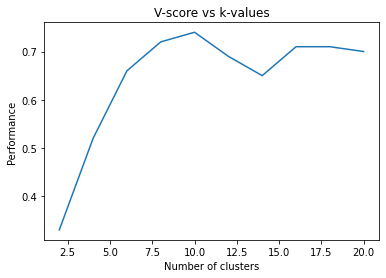

In [ ]:
import matplotlib.pyplot as plt

# x axis values
x = [2,4,6,8,10,12,14,16,18,20]
# corresponding y axis values
y = [0.33, 0.52, 0.66, 0.72, 0.74, 0.69, 0.65, 0.71, 0.71, 0.70]

# naming the x axis and y axis
plt.plot(x, y)
plt.xlabel('Number of clusters')
plt.ylabel('Performance')

# giving a title to my graph
plt.title('V-score vs k-values')

# function to show the plot
plt.show()